In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob, os
import numpy as np
import gc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import Sequence
import random
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

(17931, 96, 96) (6000, 3)


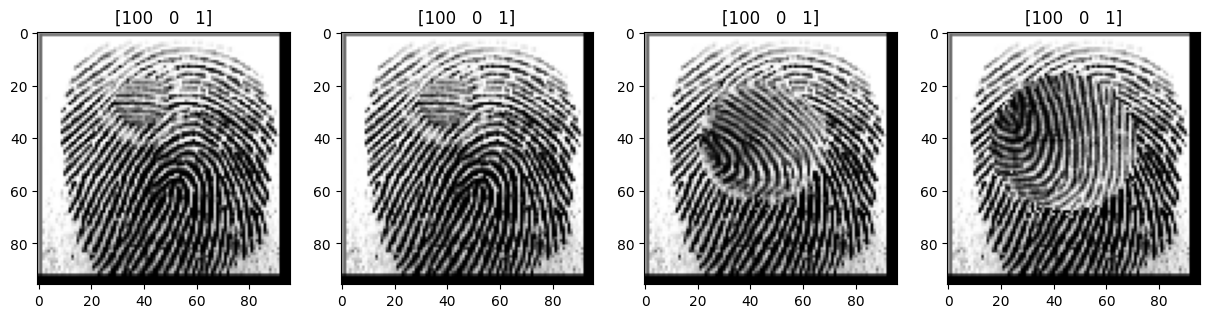

In [2]:
x_real = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_easy.npz')['data']
x_easy = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_easy.npz')['data']
x_medium = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_medium.npz')['data']
x_hard = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_hard.npz')['data']
y_real = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_real.npy')
y_easy = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_easy.npy')
y_medium = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_medium.npy')
y_hard = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_hard.npy')

print(x_real.shape, y_real.shape)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)

plt.title(y_real[0])
plt.imshow(x_real[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 2)

plt.title(y_easy[0])
plt.imshow(x_easy[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 3)

plt.title(y_medium[0])
plt.imshow(x_medium[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 4)

plt.title(y_hard[0])
plt.imshow(x_hard[0].squeeze(), cmap='gray')


C:\Users\h4uh4\AppData\Roaming\Python\Python310\site-packages\albumentations\check_version.py:147: UserWarning: Error fetching version info <urlopen error [Errno 11001] getaddrinfo failed>
  data = fetch_version_info()


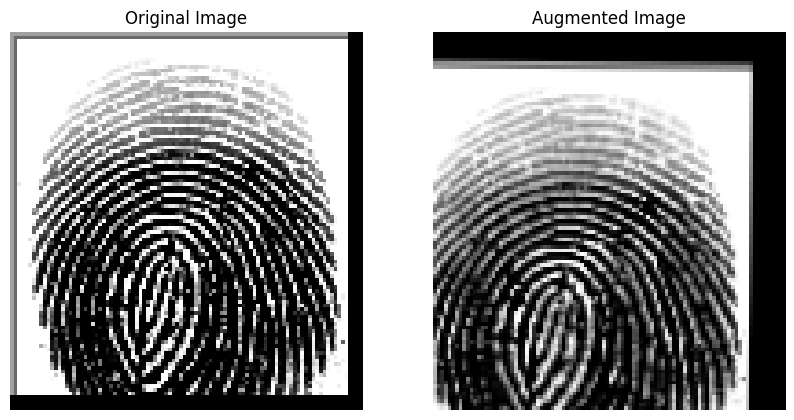

In [ ]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A


image = cv2.imread('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/Real/1__M_Left_index_finger.BMP')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Affine(scale=(0.9, 1.1), translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, rotate=(-5, 5), p=0.7),



])






augmented = augment(image=image)
augmented_image = augmented['image']


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')


plt.subplot(1, 2, 2)
plt.title("Augmented Image")
plt.imshow(augmented_image)
plt.axis('off')

plt.show()


In [ ]:

x_real = x_real[:len(y_real)]


x_data = np.concatenate([x_real, x_easy, x_medium, x_hard], axis=0)
y_data = np.concatenate([y_real, y_easy, y_medium, y_hard], axis=0)

print(f"x_data shape: {x_data.shape}")
print(f"y_data shape: {y_data.shape}")


half_size = len(x_data) // 2

x_data_half = x_data[:half_size]
y_data_half = y_data[:half_size]

print(f"x_data_half shape: {x_data_half.shape}")
print(f"y_data_half shape: {y_data_half.shape}")



assert x_data_half.shape[0] == y_data_half.shape[0], "Jumlah sample x_data dan y_data tidak sama!"


x_temp, x_test, y_temp, y_test = train_test_split(x_data_half, y_data_half, test_size=0.2, random_state=42)


x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)


print(f"Train set size: {x_train.shape[0]} samples")
print(f"Validation set size: {x_val.shape[0]} samples")
print(f"Test set size: {x_test.shape[0]} samples")


x_data shape: (55270, 96, 96)
y_data shape: (55270, 3)
x_data_half shape: (27635, 96, 96)
y_data_half shape: (27635, 3)
Train set size: 16581 samples
Validation set size: 5527 samples
Test set size: 5527 samples


In [ ]:

print("Memeriksa dataset raw untuk NaN atau Inf...")

if np.any(np.isnan(x_data_half)) or np.any(np.isinf(x_data_half)):
    print("NaN atau Inf terdeteksi pada dataset raw!")
else:
    print("Dataset raw bersih dari NaN atau Inf.")


Memeriksa dataset raw untuk NaN atau Inf...
Dataset raw bersih dari NaN atau Inf.


In [ ]:

x_train = np.expand_dims(x_train, -1).astype('float32') / 255.
x_val = np.expand_dims(x_val, -1).astype('float32') / 255.
x_test = np.expand_dims(x_test, -1).astype('float32') / 255.


Memory usage: 79.7%


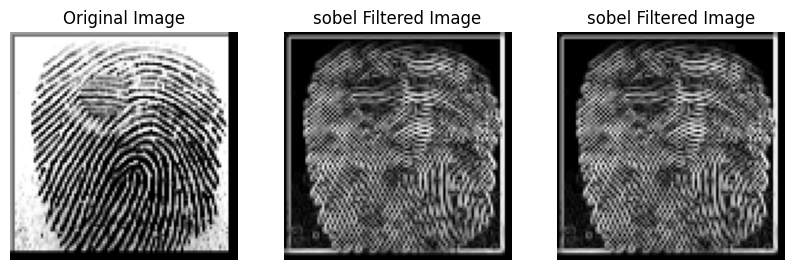

In [ ]:
import cv2
import numpy as np
import psutil
import matplotlib.pyplot as plt

def apply_sobel_filter(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    return cv2.magnitude(sobel_x, sobel_y)


x_train_sobel = np.array([apply_sobel_filter(img.squeeze()) for img in x_train])
x_val_sobel = np.array([apply_sobel_filter(img.squeeze()) for img in x_val])
x_test_sobel = np.array([apply_sobel_filter(img.squeeze()) for img in x_test])


print(f"Memory usage: {psutil.virtual_memory().percent}%")


plt.figure(figsize=(10, 5))


plt.subplot(1, 3, 1)
plt.imshow(x_train[0], cmap='gray')
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(x_train_sobel[0], cmap='gray')
plt.title("sobel Filtered Image")
plt.axis('off')


plt.subplot(1, 3, 3)
sobel_result = apply_sobel_filter(x_train[0])
plt.imshow(sobel_result, cmap='gray')
plt.title("sobel Filtered Image")
plt.axis('off')

plt.show()


In [ ]:
import gc


gc.collect()


7295

In [ ]:

x_train_sobel = np.nan_to_num(x_train_sobel)
x_val_sobel = np.nan_to_num(x_val_sobel)
x_test_sobel = np.nan_to_num(x_test_sobel)


x_train_sobel = np.expand_dims(x_train_sobel, -1).astype('float32') / np.max(x_train_sobel)
x_val_sobel = np.expand_dims(x_val_sobel, -1).astype('float32') / np.max(x_val_sobel)
x_test_sobel = np.expand_dims(x_test_sobel, -1).astype('float32') / np.max(x_test_sobel)


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.utils import Sequence


def ensure_rgb(image):
    if image.shape[-1] == 1:
        image = np.repeat(image, 3, axis=-1)
    return image


x_train_sobel_rgb = np.array([ensure_rgb(img) for img in x_train_sobel])


class PairGenerator(Sequence):
    def __init__(self, x, y, x_real, y_real, batch_size=32, augment_fn=None):
        self.x = x
        self.y = y
        self.x_real = x_real
        self.y_real = y_real
        self.batch_size = batch_size
        self.augment_fn = augment_fn


        self.label_real_dict = {}
        for idx, label in enumerate(self.y_real):
            key = ''.join(label.astype(str)).zfill(6)
            if key not in self.label_real_dict:
                self.label_real_dict[key] = []
            self.label_real_dict[key].append(idx)

        self.label_keys = list(self.label_real_dict.keys())

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        start = index * self.batch_size
        end = min((index + 1) * self.batch_size, len(self.x))


        x1_batch = np.empty((end - start, 96, 96, 3), dtype=np.float32)
        x2_batch = np.empty((end - start, 96, 96, 3), dtype=np.float32)
        y_batch = self.y[start:end]
        batch_size = len(x1_batch)

        labels = np.zeros((batch_size, 1), dtype=np.float32)

        for i, label in enumerate(y_batch):
            key = ''.join(label.astype(str)).zfill(6)

            if random.random() > 0.5 and key in self.label_real_dict:
                idx = random.choice(self.label_real_dict[key])
                x2 = self.x_real[idx]
                labels[i] = 1.
            else:
                while True:
                    unmatch_key = random.choice(self.label_keys)
                    if unmatch_key != key:
                        idx = random.choice(self.label_real_dict[unmatch_key])
                        x2 = self.x_real[idx]
                        break
                labels[i] = 0.

            x2_batch[i] = x2


            x1_batch[i] = self.x[start + i]
            x2_batch[i] = x2


            if self.augment_fn:

                if isinstance(x1_batch[i], np.ndarray):
                    x1_batch[i] = self.augment_fn(image=x1_batch[i])['image']
                elif isinstance(x1_batch[i], tf.Tensor):
                    x1_batch[i] = self.augment_fn(image=x1_batch[i].numpy())['image']
                
                if isinstance(x2_batch[i], np.ndarray):
                    x2_batch[i] = self.augment_fn(image=x2_batch[i])['image']
                elif isinstance(x2_batch[i], tf.Tensor):
                    x2_batch[i] = self.augment_fn(image=x2_batch[i].numpy())['image']

        return (x1_batch, x2_batch), labels


Shape of first image after RGB conversion: (96, 96, 3)


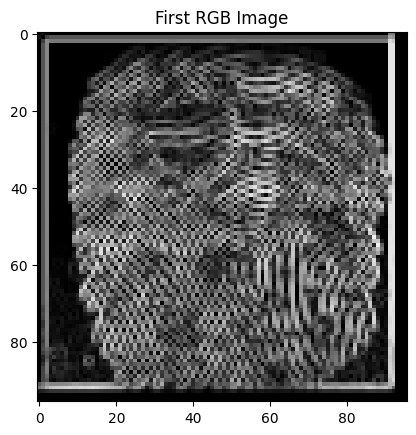

In [ ]:
import numpy as np


def ensure_rgb(image):
    if image.shape[-1] == 1:
        image = np.repeat(image, 3, axis=-1)
    return image


x_train_sobel_rgb = np.array([ensure_rgb(img) for img in x_train_sobel])


print("Shape of first image after RGB conversion:", x_train_sobel_rgb[0].shape)


import matplotlib.pyplot as plt
plt.imshow(x_train_sobel_rgb[0])
plt.title('First RGB Image')
plt.show()


Image 0 shape: (96, 96, 3)
Image 1 shape: (96, 96, 3)
Image 2 shape: (96, 96, 3)
Image 3 shape: (96, 96, 3)
Image 4 shape: (96, 96, 3)
Image 0 min value: 0.0
Image 0 max value: 0.9570242397768539
Image 1 min value: 0.0
Image 1 max value: 0.9653879353136133
Image 2 min value: 0.0
Image 2 max value: 0.8969519414061438
Image 3 min value: 0.0
Image 3 max value: 0.9557893202614633
Image 4 min value: 0.0
Image 4 max value: 0.8944271909999159


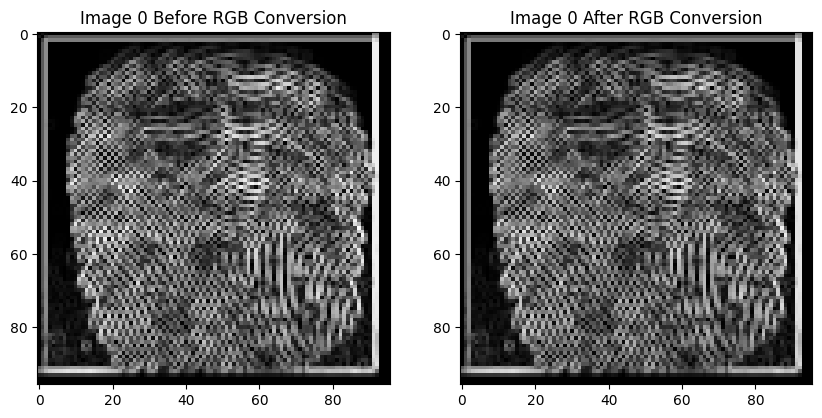

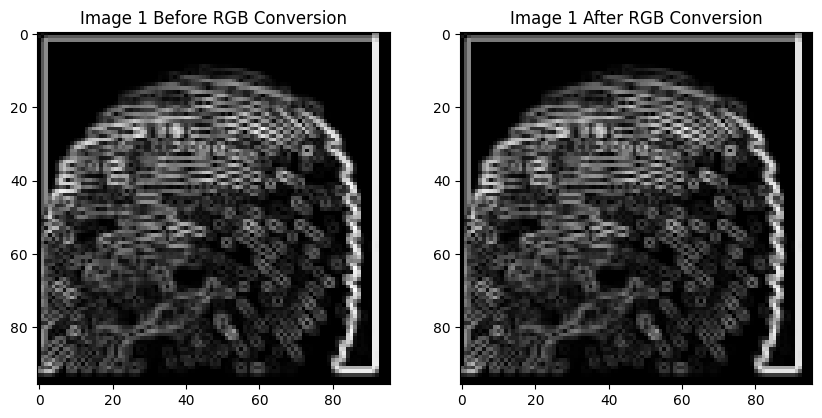

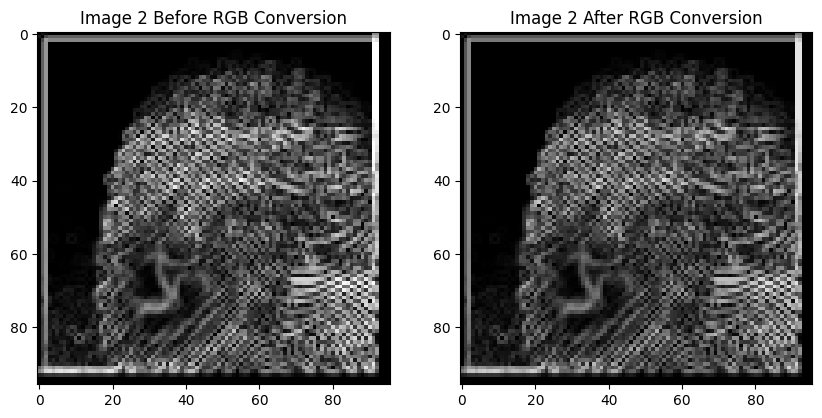

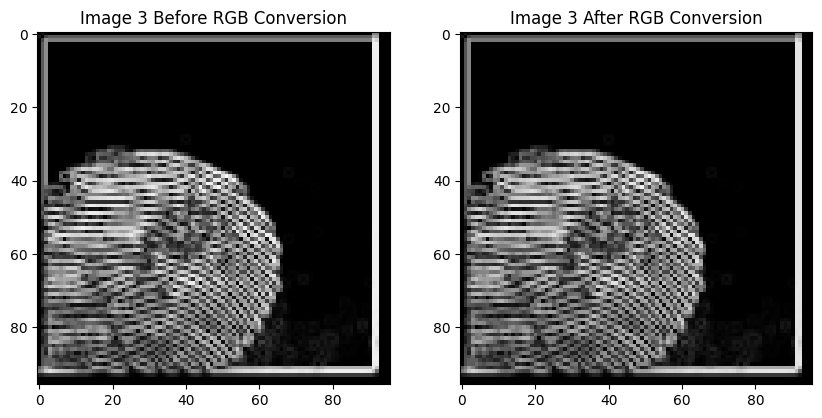

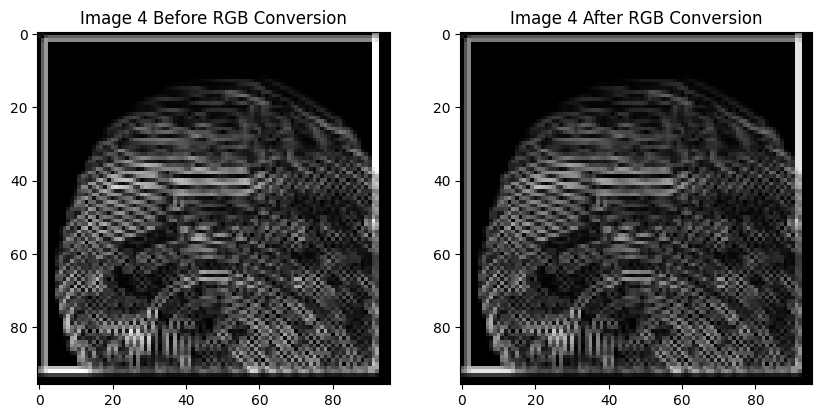

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


for i in range(5):
    print(f"Image {i} shape:", x_train_sobel_rgb[i].shape)


for i in range(5):
    print(f"Image {i} min value:", np.min(x_train_sobel_rgb[i]))
    print(f"Image {i} max value:", np.max(x_train_sobel_rgb[i]))


for i in range(5):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    if x_train_sobel[i].shape[-1] == 1:
        plt.imshow(x_train_sobel[i].squeeze(), cmap='gray')
    else:
        plt.imshow(x_train_sobel[i])
    plt.title(f'Image {i} Before RGB Conversion')


    rgb_image = ensure_rgb(x_train_sobel[i])

    plt.subplot(1, 2, 2)
    plt.imshow(rgb_image)
    plt.title(f'Image {i} After RGB Conversion')

    plt.show()


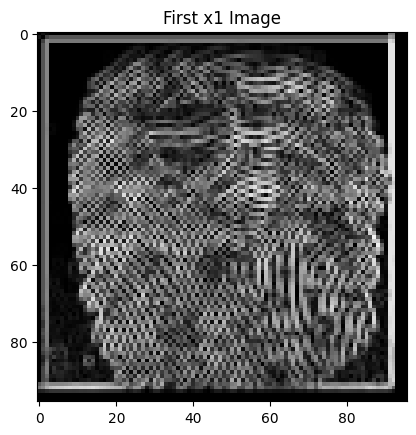

In [ ]:

plt.imshow(x_train_sobel_rgb[0])
plt.title('First x1 Image')
plt.show()


In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models


def build_vgg19_model(input_shape=(96, 96, 3)):

    base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)


    for layer in base_model.layers:
        layer.trainable = False
    

    x = layers.Flatten()(base_model.output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    output = layers.Dense(1, activation='sigmoid')(x)


    model = models.Model(inputs=base_model.input, outputs=output)

    return model


x1 = layers.Input(shape=(96, 96, 3))
x2 = layers.Input(shape=(96, 96, 3))


vgg_model = build_vgg19_model()


f1 = vgg_model(x1)
f2 = vgg_model(x2)


diff = layers.Subtract()([f1, f2])


x = layers.Dense(128, activation='relu')(diff)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)


model = models.Model(inputs=[x1, x2], outputs=output)


model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 1)         │ 20,622,657 │ input_layer[0][0… │
│ (Functional)        │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract (Subtract) │ (None, 1)         │          0 │ functional[0][0], │
│                     │                   │            │ functional[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │        256 │ subtract[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,256 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,631,234 (78.70 MB)

 Trainable params: 606,850 (2.31 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:

print("Memeriksa dataset setelah filter Laplacian...")

if np.any(np.isnan(x_train_sobel_rgb)) or np.any(np.isinf(x_train_sobel_rgb)):
    print("NaN atau Inf terdeteksi pada dataset yang sudah difilter!")
else:
    print("Dataset yang sudah difilter bersih dari NaN atau Inf.")


Memeriksa dataset setelah filter Laplacian...
Dataset yang sudah difilter bersih dari NaN atau Inf.


In [16]:
train_gen = PairGenerator(x_train_sobel_rgb, y_train, x_train_sobel_rgb, y_train, batch_size=32, augment_fn=augment)
val_gen = PairGenerator(x_val, y_val, x_val, y_val, batch_size=32, augment_fn=None)


In [ ]:

print(f"NaN atau Inf terdeteksi pada x_train_sobel setelah filter sobel: {np.any(np.isnan(x_train_sobel_rgb)) or np.any(np.isinf(x_train_sobel_rgb))}")


print(f"NaN atau Inf terdeteksi pada x_val_sobel setelah filter sobel: {np.any(np.isnan(x_val_sobel)) or np.any(np.isinf(x_val_sobel))}")
print(f"NaN atau Inf terdeteksi pada x_test_sobel setelah filter sobel: {np.any(np.isnan(x_test_sobel)) or np.any(np.isinf(x_test_sobel))}")


NaN atau Inf terdeteksi pada x_train_sobel setelah filter sobel: False
NaN atau Inf terdeteksi pada x_val_sobel setelah filter sobel: False
NaN atau Inf terdeteksi pada x_test_sobel setelah filter sobel: False


In [ ]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('sobel_vgg19_best.keras', save_best_only=True, monitor='val_loss')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    callbacks=[checkpoint, early_stop, lr_scheduler],
    verbose=2
)

Epoch 1/5


c:\Users\h4uh4\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


519/519 - 612s - 1s/step - accuracy: 0.6510 - auc: 0.7031 - loss: 0.6297 - val_accuracy: 0.7250 - val_auc: 0.8583 - val_loss: 0.5529 - learning_rate: 1.0000e-03
Epoch 2/5
519/519 - 617s - 1s/step - accuracy: 0.7176 - auc: 0.7642 - loss: 0.5835 - val_accuracy: 0.7756 - val_auc: 0.9029 - val_loss: 0.4967 - learning_rate: 1.0000e-03
Epoch 3/5
519/519 - 615s - 1s/step - accuracy: 0.7308 - auc: 0.7773 - loss: 0.5677 - val_accuracy: 0.7337 - val_auc: 0.8748 - val_loss: 0.5351 - learning_rate: 1.0000e-03
Epoch 4/5
519/519 - 615s - 1s/step - accuracy: 0.7310 - auc: 0.7756 - loss: 0.5669 - val_accuracy: 0.7664 - val_auc: 0.8749 - val_loss: 0.5062 - learning_rate: 1.0000e-03
Epoch 5/5
519/519 - 616s - 1s/step - accuracy: 0.7343 - auc: 0.7826 - loss: 0.5599 - val_accuracy: 0.7460 - val_auc: 0.9003 - val_loss: 0.5253 - learning_rate: 1.0000e-03


In [ ]:

model.save('C:/Users/h4uh4/OneDrive/Desktop/FinalCompareFriedman/Model_VGG/HasilVGG/sobel_vgg_model.keras')


Shapes: (5527, 96, 96, 3) (5527, 96, 96, 3) (5527, 1)


  0%|          | 0/100 [00:00<?, ?it/s]

173/173 ━━━━━━━━━━━━━━━━━━━━ 157s 903ms/step


  1%|          | 1/100 [02:37<4:20:02, 157.60s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 892ms/step


  2%|▏         | 2/100 [05:13<4:16:02, 156.76s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 895ms/step


  3%|▎         | 3/100 [07:49<4:12:38, 156.27s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 892ms/step


  4%|▍         | 4/100 [10:24<4:09:18, 155.81s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 891ms/step


  5%|▌         | 5/100 [12:59<4:06:11, 155.48s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 895ms/step


  6%|▌         | 6/100 [15:34<4:03:35, 155.48s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 899ms/step


  7%|▋         | 7/100 [18:11<4:01:20, 155.70s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 896ms/step


  8%|▊         | 8/100 [20:46<3:58:45, 155.71s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 897ms/step


  9%|▉         | 9/100 [23:22<3:56:13, 155.75s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 892ms/step


 10%|█         | 10/100 [25:57<3:53:18, 155.54s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 890ms/step


 11%|█         | 11/100 [28:32<3:50:18, 155.27s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 894ms/step


 12%|█▏        | 12/100 [31:07<3:47:42, 155.26s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 897ms/step


 13%|█▎        | 13/100 [33:43<3:45:20, 155.41s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 895ms/step


 14%|█▍        | 14/100 [36:18<3:42:45, 155.41s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 899ms/step


 15%|█▌        | 15/100 [38:54<3:40:28, 155.63s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 892ms/step


 16%|█▌        | 16/100 [41:29<3:37:37, 155.44s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 893ms/step


 17%|█▋        | 17/100 [44:05<3:34:55, 155.37s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 896ms/step


 18%|█▊        | 18/100 [46:40<3:32:27, 155.45s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 893ms/step


 19%|█▉        | 19/100 [49:15<3:29:42, 155.34s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 892ms/step


 20%|██        | 20/100 [51:50<3:26:56, 155.21s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 898ms/step


 21%|██        | 21/100 [54:26<3:24:38, 155.42s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 891ms/step


 22%|██▏       | 22/100 [57:01<3:21:51, 155.28s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 889ms/step


 23%|██▎       | 23/100 [59:36<3:18:57, 155.03s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 892ms/step


 24%|██▍       | 24/100 [1:02:10<3:16:19, 155.00s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 891ms/step


 25%|██▌       | 25/100 [1:04:45<3:13:39, 154.93s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 889ms/step


 26%|██▌       | 26/100 [1:07:20<3:10:53, 154.78s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 892ms/step


 27%|██▋       | 27/100 [1:09:55<3:08:21, 154.81s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 887ms/step


 28%|██▊       | 28/100 [1:12:29<3:05:36, 154.67s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 157s 909ms/step


 29%|██▉       | 29/100 [1:15:07<3:04:09, 155.63s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 162s 937ms/step


 30%|███       | 30/100 [1:17:50<3:04:06, 157.81s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 162s 939ms/step


 31%|███       | 31/100 [1:20:33<3:03:18, 159.39s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 163s 942ms/step


 32%|███▏      | 32/100 [1:23:17<3:02:07, 160.69s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 162s 936ms/step


 33%|███▎      | 33/100 [1:25:59<3:00:07, 161.30s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 162s 937ms/step


 34%|███▍      | 34/100 [1:28:42<2:57:57, 161.78s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 162s 937ms/step


 35%|███▌      | 35/100 [1:31:25<2:55:36, 162.09s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 163s 939ms/step


 36%|███▌      | 36/100 [1:34:08<2:53:15, 162.43s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 163s 940ms/step


 37%|███▋      | 37/100 [1:36:52<2:50:50, 162.70s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 163s 940ms/step


 38%|███▊      | 38/100 [1:39:35<2:48:19, 162.89s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 163s 943ms/step


 39%|███▉      | 39/100 [1:42:19<2:45:54, 163.20s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 164s 946ms/step


 40%|████      | 40/100 [1:45:03<2:43:32, 163.54s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 166s 957ms/step


 41%|████      | 41/100 [1:47:49<2:41:38, 164.38s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 852ms/step


 42%|████▏     | 42/100 [1:50:18<2:34:10, 159.49s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 847ms/step


 43%|████▎     | 43/100 [1:52:45<2:27:58, 155.76s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 846ms/step


 44%|████▍     | 44/100 [1:55:12<2:22:54, 153.11s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 849ms/step


 45%|████▌     | 45/100 [1:57:39<2:18:47, 151.41s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 844ms/step


 46%|████▌     | 46/100 [2:00:05<2:14:56, 149.94s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 47%|████▋     | 47/100 [2:02:32<2:11:27, 148.82s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 841ms/step


 48%|████▊     | 48/100 [2:04:58<2:08:15, 147.99s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 49%|████▉     | 49/100 [2:07:24<2:05:21, 147.48s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 50%|█████     | 50/100 [2:09:50<2:02:36, 147.13s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 844ms/step


 51%|█████     | 51/100 [2:12:17<2:00:02, 146.98s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 841ms/step


 52%|█████▏    | 52/100 [2:14:43<1:57:21, 146.71s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 840ms/step


 53%|█████▎    | 53/100 [2:17:09<1:54:42, 146.44s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 839ms/step


 54%|█████▍    | 54/100 [2:19:35<1:52:06, 146.23s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 840ms/step


 55%|█████▌    | 55/100 [2:22:00<1:49:35, 146.12s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 841ms/step


 56%|█████▌    | 56/100 [2:24:27<1:47:08, 146.11s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 840ms/step


 57%|█████▋    | 57/100 [2:26:52<1:44:41, 146.07s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 58%|█████▊    | 58/100 [2:29:19<1:42:17, 146.14s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 847ms/step


 59%|█████▉    | 59/100 [2:31:46<1:40:02, 146.41s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 840ms/step


 60%|██████    | 60/100 [2:34:12<1:37:31, 146.28s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 841ms/step


 61%|██████    | 61/100 [2:36:38<1:35:01, 146.20s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 839ms/step


 62%|██████▏   | 62/100 [2:39:04<1:32:30, 146.07s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 841ms/step


 63%|██████▎   | 63/100 [2:41:30<1:30:04, 146.08s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 64%|██████▍   | 64/100 [2:43:56<1:27:41, 146.15s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 841ms/step


 65%|██████▌   | 65/100 [2:46:22<1:25:13, 146.11s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 841ms/step


 66%|██████▌   | 66/100 [2:48:48<1:22:47, 146.10s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 841ms/step


 67%|██████▋   | 67/100 [2:51:14<1:20:21, 146.12s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 840ms/step


 68%|██████▊   | 68/100 [2:53:40<1:17:54, 146.08s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 843ms/step


 69%|██████▉   | 69/100 [2:56:07<1:15:31, 146.17s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 843ms/step


 70%|███████   | 70/100 [2:58:33<1:13:07, 146.25s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 71%|███████   | 71/100 [3:00:59<1:10:41, 146.24s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 843ms/step


 72%|███████▏  | 72/100 [3:03:26<1:08:16, 146.29s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 841ms/step


 73%|███████▎  | 73/100 [3:05:52<1:05:47, 146.22s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 74%|███████▍  | 74/100 [3:08:18<1:03:22, 146.23s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 75%|███████▌  | 75/100 [3:10:44<1:00:55, 146.23s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 845ms/step


 76%|███████▌  | 76/100 [3:13:11<58:32, 146.37s/it]  

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 77%|███████▋  | 77/100 [3:15:37<56:05, 146.33s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 78%|███████▊  | 78/100 [3:18:03<53:38, 146.30s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 79%|███████▉  | 79/100 [3:20:30<51:11, 146.28s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 841ms/step


 80%|████████  | 80/100 [3:22:56<48:44, 146.22s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 81%|████████  | 81/100 [3:25:22<46:18, 146.23s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 842ms/step


 82%|████████▏ | 82/100 [3:27:48<43:52, 146.23s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 147s 847ms/step


 83%|████████▎ | 83/100 [3:30:15<41:30, 146.51s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 146s 841ms/step


 84%|████████▍ | 84/100 [3:32:41<39:02, 146.40s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 145s 841ms/step


 85%|████████▌ | 85/100 [3:35:07<36:34, 146.28s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 154s 893ms/step


 86%|████████▌ | 86/100 [3:37:43<34:44, 148.90s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 899ms/step


 87%|████████▋ | 87/100 [3:40:19<32:44, 151.08s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 899ms/step


 88%|████████▊ | 88/100 [3:42:55<30:31, 152.63s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 900ms/step


 89%|████████▉ | 89/100 [3:45:31<28:11, 153.77s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 898ms/step


 90%|█████████ | 90/100 [3:48:07<25:44, 154.46s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 899ms/step


 91%|█████████ | 91/100 [3:50:44<23:14, 154.96s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 901ms/step


 92%|█████████▏| 92/100 [3:53:20<20:43, 155.43s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 901ms/step


 93%|█████████▎| 93/100 [3:55:57<18:10, 155.76s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 899ms/step


 94%|█████████▍| 94/100 [3:58:33<15:35, 155.91s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 901ms/step


 95%|█████████▌| 95/100 [4:01:09<13:00, 156.11s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 899ms/step


 96%|█████████▌| 96/100 [4:03:46<10:24, 156.14s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 899ms/step


 97%|█████████▋| 97/100 [4:06:22<07:48, 156.16s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 900ms/step


 98%|█████████▊| 98/100 [4:08:58<05:12, 156.22s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 903ms/step


 99%|█████████▉| 99/100 [4:11:35<02:36, 156.41s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 156s 901ms/step


100%|██████████| 100/100 [4:14:12<00:00, 152.52s/it]

Bootstrap AUC mean: 0.8428
95% Confidence Interval: [0.8339, 0.8510]
Indices dipilih: [ 0 24 49 74 99]
Nilai AUC diambil: [0.84353378 0.84307016 0.8404228  0.84549468 0.84609863]


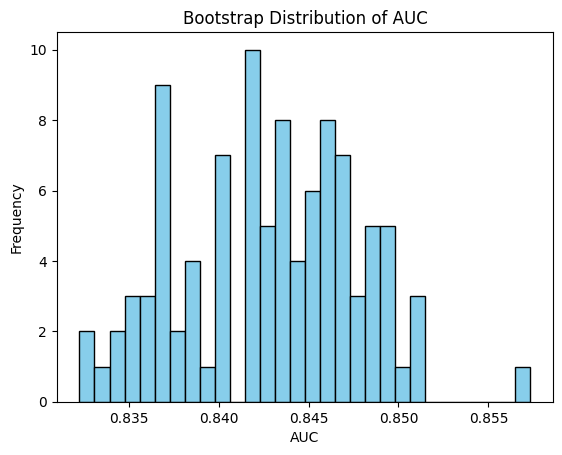

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tqdm import tqdm


test_gen = PairGenerator(x_test_sobel, y_test, x_test_sobel, y_test, batch_size=32, augment_fn=augment)

x1_list, x2_list, y_list = [], [], []
for i in range(len(test_gen)):
    (x1_batch, x2_batch), y_batch = test_gen[i]
    x1_list.append(x1_batch)
    x2_list.append(x2_batch)
    y_list.append(y_batch)

x_test_1 = np.concatenate(x1_list, axis=0)
x_test_2 = np.concatenate(x2_list, axis=0)
y_test_full = np.concatenate(y_list, axis=0)
y_test_full = y_test_full[:len(x_test_1)]

print("Shapes:", x_test_1.shape, x_test_2.shape, y_test_full.shape)


model_local = load_model('C:/Users/h4uh4/OneDrive/Desktop/FinalCompareFriedman/Model_VGG/HasilVGG/sobel_vgg_model.keras')

B = 100
n = len(x_test_1)
num_classes = len(np.unique(y_test_full))
results = []

for seed in tqdm(range(B), total=B):
    np.random.seed(seed)
    idx = np.random.choice(n, size=n, replace=True)
    x1_bs, x2_bs, y_bs = x_test_1[idx], x_test_2[idx], y_test_full[idx]

    y_pred_probs = model_local.predict([x1_bs, x2_bs], batch_size=32)
    y_bs_bin = label_binarize(y_bs, classes=range(num_classes))

    auc = roc_auc_score(y_bs_bin, y_pred_probs, multi_class='ovr', average='macro')
    results.append(auc)

auc_scores = np.array(results)
mean_auc = np.mean(auc_scores)
ci_lower, ci_upper = np.percentile(auc_scores, [2.5, 97.5])

print(f"Bootstrap AUC mean: {mean_auc:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


indices = np.linspace(0, len(auc_scores) - 1, 5, dtype=int)
sampled_aucs = auc_scores[indices]

print("Indices dipilih:", indices)
print("Nilai AUC diambil:", sampled_aucs)


with open("sobel_bootstrap_auc_results.txt", "w") as f:
    f.write("Sampled 5 AUC values (berjarak):\n")
    for val in sampled_aucs:
        f.write(f"{val:.6f}\n")
    f.write("\n")
    f.write(f"Bootstrap AUC mean: {mean_auc:.4f}\n")
    f.write(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]\n\n")
    f.write("All Bootstrap AUC scores:\n")
    for val in auc_scores:
        f.write(f"{val:.6f}\n")


plt.hist(auc_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Bootstrap Distribution of AUC')
plt.xlabel('AUC')
plt.ylabel('Frequency')
plt.show()


c:\Users\h4uh4\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 155s 897ms/step - accuracy: 0.8027 - auc: 0.9113 - loss: 0.4656
Test Loss: 0.458739310503006
Test Accuracy: 0.8089379668235779
Test AUC: 0.9126113057136536


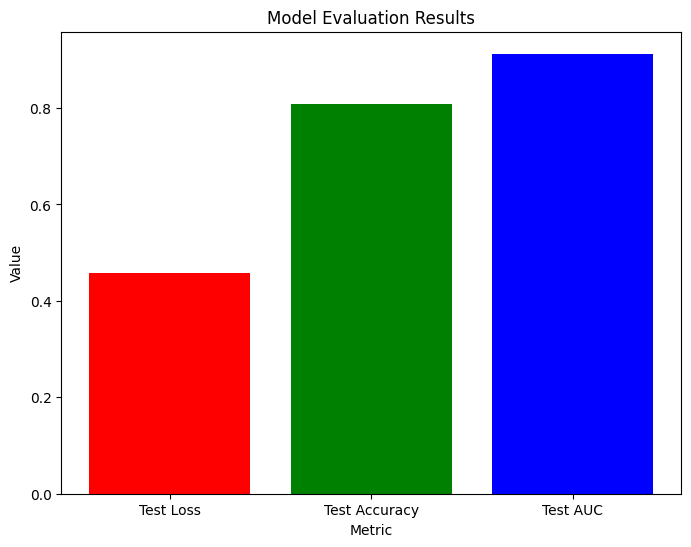

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

test_gen = PairGenerator(x_test_sobel, y_test, x_test_sobel, y_test, batch_size=32, augment_fn=None)


test_loss, test_accuracy, test_auc = model.evaluate(test_gen)


print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")


results = [test_loss, test_accuracy, test_auc]
labels = ['Test Loss', 'Test Accuracy', 'Test AUC']


plt.figure(figsize=(8, 6))
plt.bar(labels, results, color=['red', 'green', 'blue'])


plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Evaluation Results')


plt.show()
